# K-nearest neigbours (KNN)


# 1. **Introduction**

How would you descibe a square? a circle? What about an apple or a banana? Intuitively these things are easy to picture, but how could we teach a computer to do so as well 🤔. 

1.1 Motivation


At it's core we need to form some kind of basis for pattern recognition - a way for the computer to be able to recognize and classify different images. There are many ways to do this, but one of the easiest to implement and understand is the **k nearest neighbours (kNN)** algorithm.

1.2 How it Works

Simply put, the kNN algorithm takes a cookie cutter approach to classifying images. Imagine you had a dataset of 10,000 birds, and a "test" image of a Cardinal that you want to classify. All the kNN would do is compare the picture of the Cardinal to **every** picture in the dataset and return the **k** closest images. Hence the name **k nearest neighbours**

1.3 Parameters

You might be asking: what determines how close two images are? How many k images are returned? We will be using L1 distance and using a k value of k. Parameters, hyperparameter and tuning for performance will be discussed in another module

# 2. Load Data

2.0 Import Dependencies

In [16]:
from google.colab import drive, files
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# This is the path to our data (Test and Training folder)
data_dir = "/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA"

2.1 Load some images to test

In [36]:
train = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Train')
test = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Test')

Found 200 files belonging to 10 classes.
Found 10 files belonging to 2 classes.


In [47]:
data_iterator = train.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

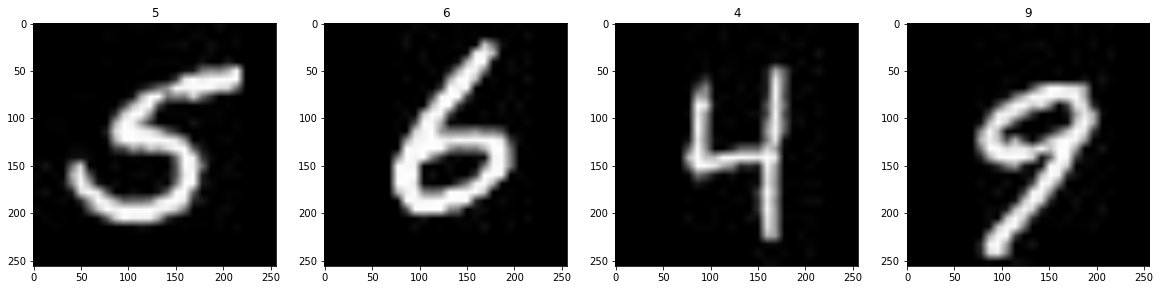

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [45]:
# Cool it works!

# 3. Train and Test

3.1 Training

The kNN model actually requires no "training"! Apart from storing the training data, there is nothing to do in terms of training the model because all the computation is done at test time. Unfortunately this is not optimal because in most use cases the heavy computation should be done whilst training the model so that at test time it is able to identify and classify things quickly

3.2 Testing

In [33]:
def predict(test, train):
  distances = np.sum(np.abs(test - train), axis = 1)
  min_index = np.argmin(distances) # get the index with smallest distance
  return min_index

In [52]:
for image in test:
  predict(image)

TypeError: ignored